In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [32]:
credit_df = pd.read_csv("C:\DDriveData\Python\Great Lakes\german_credit.csv")

In [33]:
credit_df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [34]:
credit_df.shape

(1000, 21)

In [35]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [36]:
credit_df['account_check_status'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [37]:
credit_df['credit_history'].value_counts()

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64

In [38]:
credit_df['purpose'].value_counts()

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
furniture/equipment              12
repairs                          12
retraining                        9
Name: purpose, dtype: int64

In [39]:
credit_df['savings'].value_counts()

... < 100 DM                   603
unknown/ no savings account    183
100 <= ... < 500 DM            103
500 <= ... < 1000 DM            63
.. >= 1000 DM                   48
Name: savings, dtype: int64

In [40]:
credit_df['present_emp_since'].value_counts()

1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: present_emp_since, dtype: int64

In [41]:
credit_df['personal_status_sex'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: personal_status_sex, dtype: int64

In [42]:
print(credit_df['other_debtors'].value_counts())
print(credit_df['property'].value_counts())
print(credit_df['other_installment_plans'].value_counts())
print(credit_df['housing'].value_counts())
print(credit_df['job'].value_counts())
print(credit_df['foreign_worker'].value_counts())

none            907
guarantor        52
co-applicant     41
Name: other_debtors, dtype: int64
if not A121/A122 : car or other, not in attribute 6                 332
real estate                                                         282
if not A121 : building society savings agreement/ life insurance    232
unknown / no property                                               154
Name: property, dtype: int64
none      814
bank      139
stores     47
Name: other_installment_plans, dtype: int64
own         713
rent        179
for free    108
Name: housing, dtype: int64
skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: job, dtype: int64
yes    963
no      37
Name: foreign_worker, dtype: int64


In [43]:
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [44]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
split_1,split_2 = train_test_split(credit_df, test_size = 0.5, shuffle = True,random_state = 99)

In [47]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [48]:
# Print Shape of model data

In [49]:
split_1.shape

(500, 21)

In [50]:
split_2.shape

(500, 21)

In [51]:
split_1 = pd.get_dummies(split_1,drop_first=True)

In [52]:
split_1.shape

(500, 49)

### Check for highly correlated variables but don't required any treatment for this use case

In [53]:
df2 = split_1.corr().unstack().reset_index()
df2[((df2[0] > 0.5)&(df2[0] < 1)) | (df2[0] < -0.6)]

,level_0,level_1,0
51,duration_in_month,credit_amount,0.598345
99,credit_amount,duration_in_month,0.598345
305,credits_this_bank,credit_history_critical account/ other credits...,0.529255
545,credit_history_critical account/ other credits...,credits_this_bank,0.529255
552,credit_history_critical account/ other credits...,credit_history_existing credits paid back duly...,-0.706554
648,credit_history_existing credits paid back duly...,credit_history_critical account/ other credits...,-0.706554
1751,other_debtors_guarantor,other_debtors_none,-0.732025
1799,other_debtors_none,other_debtors_guarantor,-0.732025
2101,housing_own,housing_rent,-0.717019
2149,housing_rent,housing_own,-0.717019


### Drop the original variables which are converted to dummy

In [54]:
col = pd.DataFrame(split_1.columns)

In [55]:
col

,0
0,default
1,duration_in_month
2,credit_amount
3,installment_as_income_perc
4,present_res_since
5,age
6,credits_this_bank
7,people_under_maintenance
8,account_check_status_< 0 DM
9,account_check_status_>= 200 DM / salary assign...


In [56]:
split_1.dtypes

default                                                                       int64
duration_in_month                                                             int64
credit_amount                                                                 int64
installment_as_income_perc                                                    int64
present_res_since                                                             int64
age                                                                           int64
credits_this_bank                                                             int64
people_under_maintenance                                                      int64
account_check_status_< 0 DM                                                   uint8
account_check_status_>= 200 DM / salary assignments for at least 1 year       uint8
account_check_status_no checking account                                      uint8
credit_history_critical account/ other credits existing (not at this bank)  

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [57]:
y = split_1['default']

In [58]:
X = split_1.iloc[:,1:]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=99)

In [60]:
X_train.shape

(350, 48)

In [61]:
y_train.shape

(350,)

In [62]:
y_test.head(2)

197    1
445    0
Name: default, dtype: int64

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
RFC = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion="entropy",random_state=9999)

In [65]:
rfcl = RFC.fit(X_train,y_train)

In [66]:
y_predict = rfcl.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       111
          1       0.58      0.46      0.51        39

avg / total       0.76      0.77      0.76       150



In [68]:
confusion_matrix(y_test,y_predict)

array([[98, 13],
       [21, 18]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test,y_predict)

0.77333333333333332

### Q6 Show the list of the features importance( 1 Marks)

In [79]:
imp = RFC.feature_importances_

In [80]:
sorted_imp = pd.DataFrame(sorted(zip(imp, list(X_test)), reverse=True))

In [81]:
sorted_imp

,0,1
0,0.113297,credit_amount
1,0.091518,age
2,0.082581,duration_in_month
3,0.055411,account_check_status_no checking account
4,0.040032,installment_as_income_perc
5,0.037238,savings_... < 100 DM
6,0.037014,present_res_since
7,0.030199,account_check_status_< 0 DM
8,0.025091,property_unknown / no property
9,0.022910,other_installment_plans_none


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [86]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)

In [87]:
#Validate the Random Forest model build above using k fold

In [89]:
result = cross_val_score(RFC, X_train, y_train, cv=kfold)

In [8]:
#Calculate Mean score

In [90]:
result.mean()

0.73142857142857154

In [9]:
# Calculate score standard deviation using std()

In [91]:
result.std()

0.055988336977901211

# Q8 Print the confusion matrix( 1 Marks)

In [92]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test,y_predict)

array([[98, 13],
       [21, 18]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [98]:
from sklearn.metrics import classification_report

In [99]:
print(classification_report(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.82      0.88      0.85       111
          1       0.58      0.46      0.51        39

avg / total       0.76      0.77      0.76       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [10]:
#Hint: Use roc_curve

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

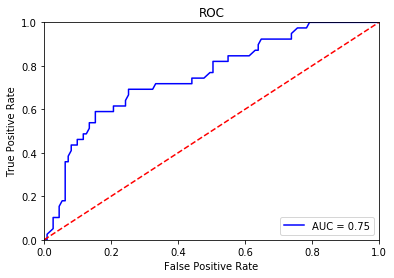

In [110]:
prob = RFC.predict_proba(X_test)
preds = prob[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [111]:
metrics.auc(fpr, tpr)

0.75317625317625314

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []